### Forecasting Energy Consumption with Time Series using Python Project

#### *** Problem Statement ***

Forecasting energy consumption can be ueful for optimizing the energy generation process.Furthermore it can play a major role in comprehensive planning, operation, management and cascade utilization of energy systems. It can also act as a key technology to promote the energy market. In this project we will use the hitsorical data of monthly electrivity consumption and forecast demand for coming months.

Explore the data and find the patterns present in the data. Apply Time series techniques for forecasting the energy consumption for next 3 years.

#### Data Description

-Date: Monthly dates from 01/1939 To 09/2019
-ENERGY_INDEX: Energy consumption

#### EDA objectives

- Is target variable normal with constant volatality
- Is there a seasonal pattern
- Is there a trend pattern

#### Model building objectives

- Train a machine learning model being able to predict on future data 36 months periods ahead
- Assessment will be carried out computing MAPE for each forecasting over holdout dataset

#### Import Libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

from  scipy.stats import skew, kurtosis, shapiro

import warnings
warnings.filterwarnings("ignore")

#### Reading Data

In [3]:
df = pd.read_csv('energy consumption.csv', encoding='utf8')
title ="Energy Consumption"

print(len(df))
print(df.head())

969
      DATE  ENERGY_INDEX
0  01/1939        3.3842
1  02/1939        3.4100
2  03/1939        3.4875
3  04/1939        3.5133
4  05/1939        3.5133


so it has 969 records and 2 columns 

#### Explore Data

In [4]:
df.dtypes

DATE             object
ENERGY_INDEX    float64
dtype: object

#### Change the DATE column to datetime format

In [6]:
#### Change the DATE column to a datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE            datetime64[ns]
ENERGY_INDEX           float64
dtype: object

#### Set the DATE column to be the new index

In [7]:
# DON'T WRITE HERE
df.set_index('DATE',inplace=True)
df.head()

,ENERGY_INDEX
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [18]:
df.tail()

,ENERGY_INDEX,Month,Year
DATE,,,
2019-05-01,91.9046,May,2019
2019-06-01,98.4397,June,2019
2019-07-01,112.9469,July,2019
2019-08-01,111.6645,August,2019
2019-09-01,102.2911,September,2019


#### Plot the Dataframe with a simple line plot

<AxesSubplot:xlabel='DATE'>

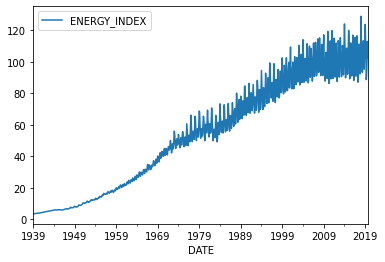

In [8]:
df.plot()

The plot is showing seasonality from year 1970 onwards

#### Add a column called 'Month' that takes the onth value from index

In [9]:
df['Month'] = df.index.month
df.head()

,ENERGY_INDEX,Month
DATE,,
1939-01-01,3.3842,1
1939-02-01,3.4100,2
1939-03-01,3.4875,3
1939-04-01,3.5133,4
1939-05-01,3.5133,5


In [10]:
df['Month'] = df.index.strftime('%B')
df.head()

,ENERGY_INDEX,Month
DATE,,
1939-01-01,3.3842,January
1939-02-01,3.4100,February
1939-03-01,3.4875,March
1939-04-01,3.5133,April
1939-05-01,3.5133,May


#### Add a column called 'Year' that takes the onth value from index

In [12]:
df['Year'] = df.index.year
df.head()

,ENERGY_INDEX,Month,Year
DATE,,,
1939-01-01,3.3842,January,1939
1939-02-01,3.4100,February,1939
1939-03-01,3.4875,March,1939
1939-04-01,3.5133,April,1939
1939-05-01,3.5133,May,1939


In [16]:
df['Year'] = df.index.strftime('%Y')
df.head()

,ENERGY_INDEX,Month,Year
DATE,,,
1939-01-01,3.3842,January,1939
1939-02-01,3.4100,February,1939
1939-03-01,3.4875,March,1939
1939-04-01,3.5133,April,1939
1939-05-01,3.5133,May,1939


#### Create a box plot that groups by Year field

<AxesSubplot:title={'center':'ENERGY_INDEX'}, xlabel='[Year]'>

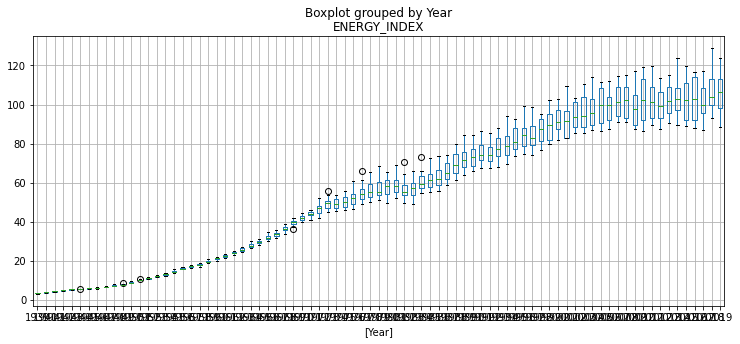

In [17]:
df.boxplot(by='Year', figsize=(12,5))

#### Simple Moving Average

In [20]:
df.dropna(inplace=True)

In [24]:
df['6-month-SMA'] = df['ENERGY_INDEX'].rolling(window=6).mean()
df['12-month-SMA'] = df['ENERGY_INDEX'].rolling(window=12).mean()

In [25]:
df.head(15)

,ENERGY_INDEX,Month,Year,6-month-SMA,12-month-SMA
DATE,,,,,
1939-01-01,3.3842,January,1939,NaN,NaN
1939-02-01,3.4100,February,1939,NaN,NaN
1939-03-01,3.4875,March,1939,NaN,NaN
1939-04-01,3.5133,April,1939,NaN,NaN
1939-05-01,3.5133,May,1939,NaN,NaN
1939-06-01,3.5650,June,1939,3.478883,NaN
1939-07-01,3.5650,July,1939,3.509017,NaN
1939-08-01,3.6167,August,1939,3.543467,NaN
1939-09-01,3.7200,September,1939,3.582217,NaN


<AxesSubplot:xlabel='DATE'>

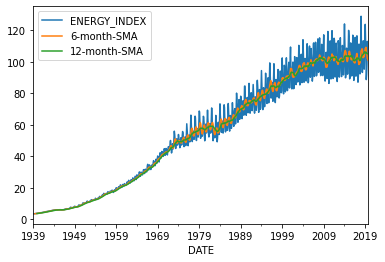

In [26]:
df.plot()

#### Exponentially Weighted Moving Average

I just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:

Smaller windows will lead to more noise, rather than signal
It will always lag by the size of the window
It will never reach to full peak or valley of the data due to the averaging.
Does not really inform you about possible future behavior, all it really does is describe trends in your data.
Extreme historical values can skew your SMA significantly

In [30]:
df['EWMA12'] = df['ENERGY_INDEX'].ewm(span=12,adjust=False).mean()

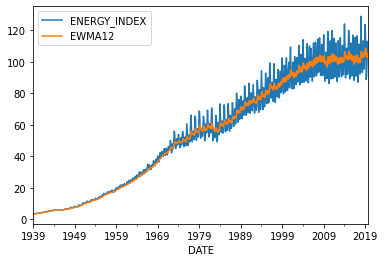

In [31]:
df[['ENERGY_INDEX','EWMA12']].plot();

#### Comparing SMA to EWMA

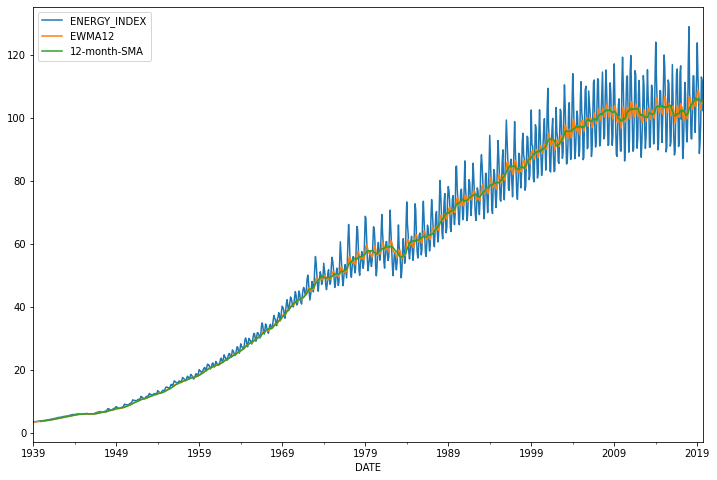

In [32]:
df[['ENERGY_INDEX','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

#### Simple Exponential Smoothing

The above example employed <em>Simple Exponential Smoothing</em> with one smoothing factor <strong>α</strong>. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above

#### Double Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['ENERGY_INDEX'], trend='add').fit().fittedvalues.shift(-1)
df.head()

/home/ana003162/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,ENERGY_INDEX,Month,Year,6-month-SMA,12-month-SMA,EWMA12,DESadd12
DATE,,,,,,,
1939-01-01,3.3842,January,1939,NaN,NaN,3.384200,3.488232
1939-02-01,3.4100,February,1939,NaN,NaN,3.388169,3.514032
1939-03-01,3.4875,March,1939,NaN,NaN,3.403451,3.591532
1939-04-01,3.5133,April,1939,NaN,NaN,3.420351,3.617332
1939-05-01,3.5133,May,1939,NaN,NaN,3.434651,3.617332


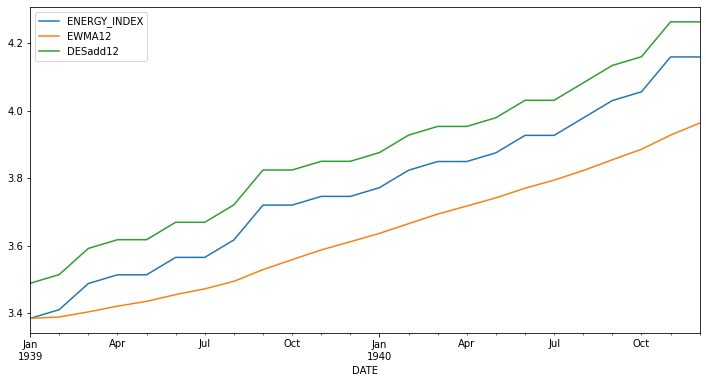

In [34]:
df[['ENERGY_INDEX','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>

#### Let's see if using a multiplicative seasonal adjustment helps.

In [35]:
df['DESmul12'] = ExponentialSmoothing(df['ENERGY_INDEX'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

/home/ana003162/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,ENERGY_INDEX,Month,Year,6-month-SMA,12-month-SMA,EWMA12,DESadd12,DESmul12
DATE,,,,,,,,
1939-01-01,3.3842,January,1939,NaN,NaN,3.384200,3.488232,3.384790
1939-02-01,3.4100,February,1939,NaN,NaN,3.388169,3.514032,3.409985
1939-03-01,3.4875,March,1939,NaN,NaN,3.403451,3.591532,3.487485
1939-04-01,3.5133,April,1939,NaN,NaN,3.420351,3.617332,3.513290
1939-05-01,3.5133,May,1939,NaN,NaN,3.434651,3.617332,3.513292


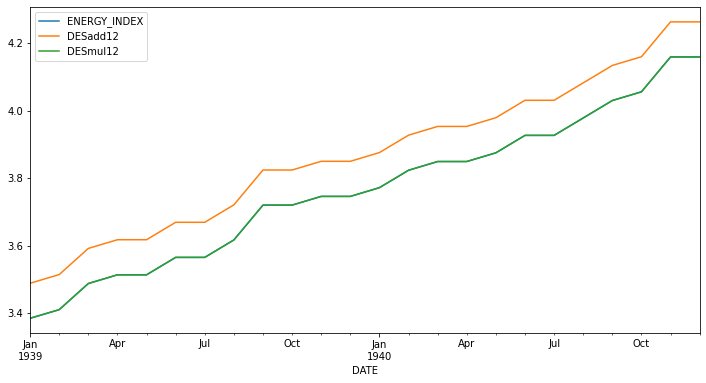

In [36]:
df[['ENERGY_INDEX','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line following closely to the original data.

#### Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 

In [37]:
df['TESadd12'] = ExponentialSmoothing(df['ENERGY_INDEX'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

/home/ana003162/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,ENERGY_INDEX,Month,Year,6-month-SMA,12-month-SMA,EWMA12,DESadd12,DESmul12,TESadd12
DATE,,,,,,,,,
1939-01-01,3.3842,January,1939,NaN,NaN,3.384200,3.488232,3.384790,3.348238
1939-02-01,3.4100,February,1939,NaN,NaN,3.388169,3.514032,3.409985,3.440340
1939-03-01,3.4875,March,1939,NaN,NaN,3.403451,3.591532,3.487485,3.541258
1939-04-01,3.5133,April,1939,NaN,NaN,3.420351,3.617332,3.513290,3.623206
1939-05-01,3.5133,May,1939,NaN,NaN,3.434651,3.617332,3.513292,3.681636


In [38]:
df['TESmul12'] = ExponentialSmoothing(df['ENERGY_INDEX'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

/home/ana003162/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,ENERGY_INDEX,Month,Year,6-month-SMA,12-month-SMA,EWMA12,DESadd12,DESmul12,TESadd12,TESmul12
DATE,,,,,,,,,,
1939-01-01,3.3842,January,1939,NaN,NaN,3.384200,3.488232,3.384790,3.348238,3.476989
1939-02-01,3.4100,February,1939,NaN,NaN,3.388169,3.514032,3.409985,3.440340,3.321030
1939-03-01,3.4875,March,1939,NaN,NaN,3.403451,3.591532,3.487485,3.541258,3.295002
1939-04-01,3.5133,April,1939,NaN,NaN,3.420351,3.617332,3.513290,3.623206,3.339035
1939-05-01,3.5133,May,1939,NaN,NaN,3.434651,3.617332,3.513292,3.681636,3.409636


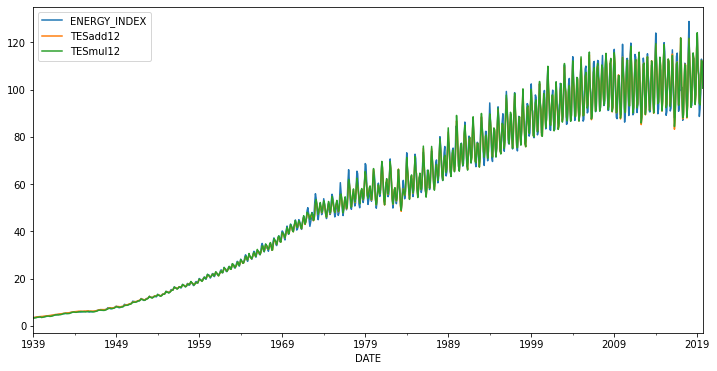

In [39]:
df[['ENERGY_INDEX','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

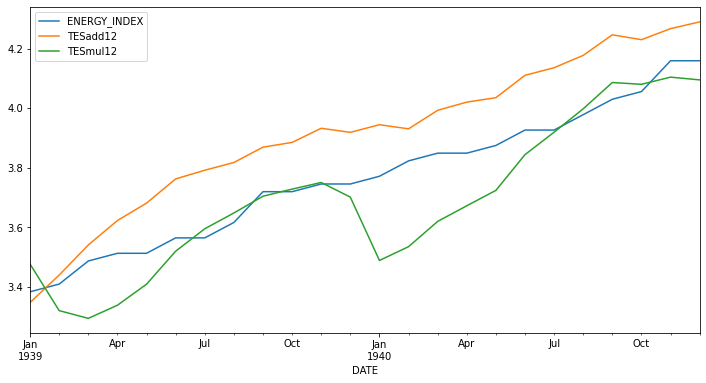

In [40]:
df[['ENERGY_INDEX','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, we might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. 